In [66]:

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kruskal
import math

pd.set_option ('display.max_columns', None)

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, train_test_split

from sklearn.preprocessing import normalize, LabelEncoder, OneHotEncoder, StandardScaler

In [67]:
df = pd.read_csv(r"C:\Users\QB183AP\OneDrive - EY\Documents\Machine Learning\newborn_train.csv")
print(df.shape)
df.head()

(2398116, 14)


,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045
1,45.80,NaN,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061
2,NaN,1.00,NaN,1,66.00,NaN,33.00,6,0.00,3,NaN,N,F,3827
3,24.30,1.00,157.00,1,NaN,20.00,27.00,6,0.00,3,9.00,N,M,3997
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240


In [68]:
missing_percentages = df.isnull().sum()/len(df)
missing_percentages[missing_percentages>0]

mother_body_mass_index        0.06
mother_marital_status         0.17
mother_delivery_weight        0.01
mother_height                 0.10
mother_weight_gain            0.03
father_age                    0.19
cigarettes_before_pregnancy   0.00
number_prenatal_visits        0.02
dtype: float64

In [69]:
df.var()

C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32664\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


mother_body_mass_index            45.64
mother_marital_status              0.24
mother_delivery_weight          1711.41
mother_race                        1.24
mother_height                      8.04
mother_weight_gain               229.41
father_age                        46.41
father_education                   5.32
cigarettes_before_pregnancy       22.38
prenatal_care_month              226.66
number_prenatal_visits            17.62
newborn_weight                348657.62
dtype: float64

In [70]:
df["mother_body_mass_index"].fillna(((df["mother_delivery_weight"]-df["mother_weight_gain"])/(df["mother_height"]**2)*703), inplace=True)

In [71]:
df.head()

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045
1,45.80,NaN,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061
2,NaN,1.00,NaN,1,66.00,NaN,33.00,6,0.00,3,NaN,N,F,3827
3,24.30,1.00,157.00,1,NaN,20.00,27.00,6,0.00,3,9.00,N,M,3997
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240


In [72]:
def calculate_height(row):
    weight_pounds = row["mother_delivery_weight"]-row["mother_weight_gain"]
    bmi = row["mother_body_mass_index"]
    height_inches = math.sqrt(weight_pounds / (bmi / 703))
    return height_inches

# Fill NaN values in the "height" column with calculated heights
df["mother_height"].fillna(df.apply(lambda row: calculate_height(row) if math.isnan(row["mother_height"]) else row["mother_height"], axis=1), inplace=True)


count   2363158.00
mean        188.32
std          41.37
min         100.00
1%          120.00
5%          135.00
10%         143.00
25%         159.00
50%         181.00
75%         210.00
90%         244.00
95%         267.00
99%         316.00
max         400.00
Name: mother_delivery_weight, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32664\2062125516.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mother_delivery_weight'], color='g', bins=100, hist_kws={'alpha': 0.4});


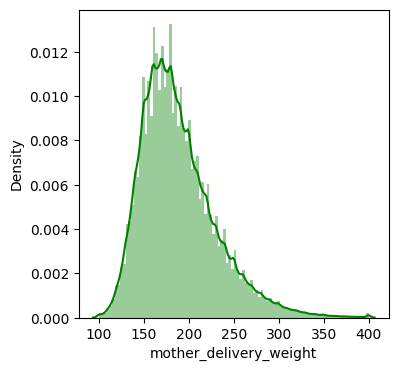

In [73]:
print(df['mother_delivery_weight'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90,0.95,  0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(df['mother_delivery_weight'], color='g', bins=100, hist_kws={'alpha': 0.4});

count   2334679.00
mean         27.17
std           6.76
min           9.45
1%           17.20
5%           19.00
10%          20.10
25%          22.30
50%          25.70
75%          30.70
90%          36.50
95%          40.30
99%          48.30
max         248.72
Name: mother_body_mass_index, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32664\4135322326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mother_body_mass_index'], color='g', bins=100, hist_kws={'alpha': 0.4});


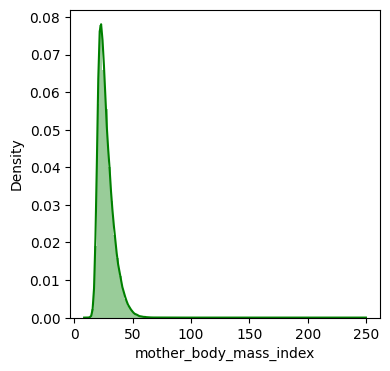

In [74]:
print(df['mother_body_mass_index'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90,0.95,  0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(df['mother_body_mass_index'], color='g', bins=100, hist_kws={'alpha': 0.4});

<Axes: xlabel='mother_body_mass_index'>

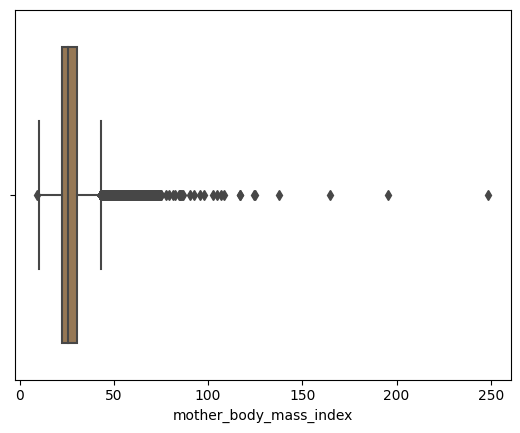

In [75]:
sns.boxplot(data=df, x="mother_body_mass_index", palette=("cubehelix"))

In [76]:
df=df[df["mother_body_mass_index"]<80]

In [77]:
print(df["mother_delivery_weight"].median())
print(df["mother_delivery_weight"][df["mother_body_mass_index"] < 22].median())
print(df["mother_delivery_weight"][(df["mother_body_mass_index"] >=22) & (df["mother_body_mass_index"] <26) ].median())
print(df["mother_delivery_weight"][(df["mother_body_mass_index"] >=26) & (df["mother_body_mass_index"] <30) ].median())
print(df["mother_delivery_weight"][(df["mother_body_mass_index"] >=30)].median())

181.0
150.0
171.0
190.0
228.0


In [78]:
# Calculate the median values for different BMI bins
median_bmi_lt_22 = df.loc[df["mother_body_mass_index"] < 22, "mother_delivery_weight"].median()
median_bmi_22_26 = df.loc[(df["mother_body_mass_index"] >= 22) & (df["mother_body_mass_index"] < 26), "mother_delivery_weight"].median()
median_bmi_26_30 = df.loc[(df["mother_body_mass_index"] >= 26) & (df["mother_body_mass_index"] < 30), "mother_delivery_weight"].median()
median_bmi_gte_30 = df.loc[df["mother_body_mass_index"] >= 30, "mother_delivery_weight"].median()

# Replace missing values of "mother_delivery_weight" based on BMI bins
df.loc[(df["mother_body_mass_index"] < 22) & df["mother_delivery_weight"].isna(), "mother_delivery_weight"] = median_bmi_lt_22
df.loc[((df["mother_body_mass_index"] >= 22) & (df["mother_body_mass_index"] < 26)) & df["mother_delivery_weight"].isna(), "mother_delivery_weight"] = median_bmi_22_26
df.loc[((df["mother_body_mass_index"] >= 26) & (df["mother_body_mass_index"] < 30)) & df["mother_delivery_weight"].isna(), "mother_delivery_weight"] = median_bmi_26_30
df.loc[(df["mother_body_mass_index"] >= 30) & df["mother_delivery_weight"].isna(), "mother_delivery_weight"] = median_bmi_gte_30

# Print the resulting DataFrame with the replaced missing values
df.head()


,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045
1,45.80,NaN,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061
3,24.30,1.00,157.00,1,62.96,20.00,27.00,6,0.00,3,9.00,N,M,3997
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240
5,30.90,2.00,231.00,1,63.99,51.00,27.00,3,0.00,4,10.00,N,M,3544


In [79]:
df.isnull().sum()

mother_body_mass_index              0
mother_marital_status          402352
mother_delivery_weight              0
mother_race                         0
mother_height                    2266
mother_weight_gain              23914
father_age                     428791
father_education                    0
cigarettes_before_pregnancy      9063
prenatal_care_month                 0
number_prenatal_visits          49877
previous_cesarean                   0
newborn_gender                      0
newborn_weight                      0
dtype: int64

count   2332389.00
mean         64.12
std           2.83
min          33.00
1%           58.00
5%           60.00
10%          61.00
25%          62.00
50%          64.00
75%          66.00
90%          68.00
95%          69.00
99%          71.00
max          83.04
Name: mother_height, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32664\802585247.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mother_height'], color='g', bins=100, hist_kws={'alpha': 0.4});


64.12177498895316
64.0
64.0


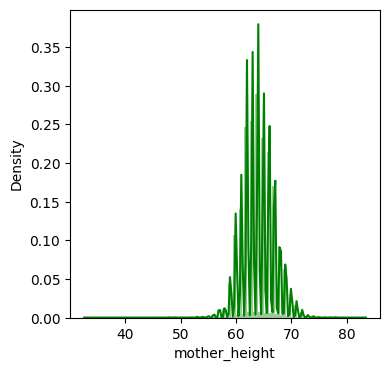

In [80]:
print(df['mother_height'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90,0.95,  0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(df['mother_height'], color='g', bins=100, hist_kws={'alpha': 0.4});

print(df["mother_height"].mean())
print(df["mother_height"].median())
print(df["mother_height"].mode().iloc[0])

<Axes: xlabel='mother_height'>

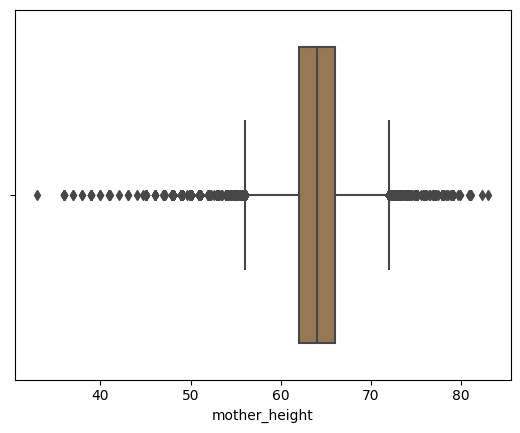

In [81]:
sns.boxplot(data=df, x="mother_height", palette=("cubehelix"))

In [82]:

mean_height = np.mean(df.loc[df["mother_height"] > 50, "mother_height"].values)
print(mean_height)

64.12703560399092


In [83]:
df=df[(df["mother_height"] > 50) & (df["mother_height"] < 80)]

In [84]:
df["mother_height"].fillna(df["mother_height"].mean(), inplace=True)

In [85]:
df.isna().sum()

mother_body_mass_index              0
mother_marital_status          401891
mother_delivery_weight              0
mother_race                         0
mother_height                       0
mother_weight_gain              21639
father_age                     428072
father_education                    0
cigarettes_before_pregnancy      9037
prenatal_care_month                 0
number_prenatal_visits          49540
previous_cesarean                   0
newborn_gender                      0
newborn_weight                      0
dtype: int64

count   2309964.00
mean         29.49
std          15.15
min           0.00
1%            0.00
5%            5.00
10%          10.00
25%          20.00
50%          29.00
75%          38.00
90%          48.00
95%          55.00
99%          72.00
max          98.00
Name: mother_weight_gain, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32664\2525109101.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mother_weight_gain'], color='g', bins=100, hist_kws={'alpha': 0.4});


29.49397436496846
29.0
30.0


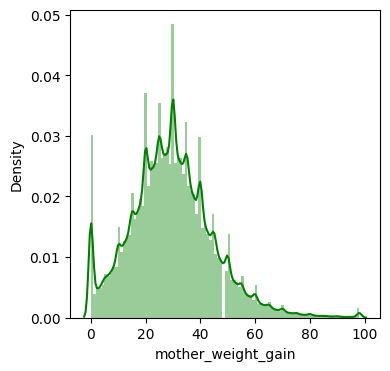

In [86]:
print(df['mother_weight_gain'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95,  0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(df['mother_weight_gain'], color='g', bins=100, hist_kws={'alpha': 0.4});

print(df["mother_weight_gain"].mean())
print(df["mother_weight_gain"].median())
print(df["mother_weight_gain"].mode().iloc[0])

<Axes: xlabel='mother_weight_gain'>

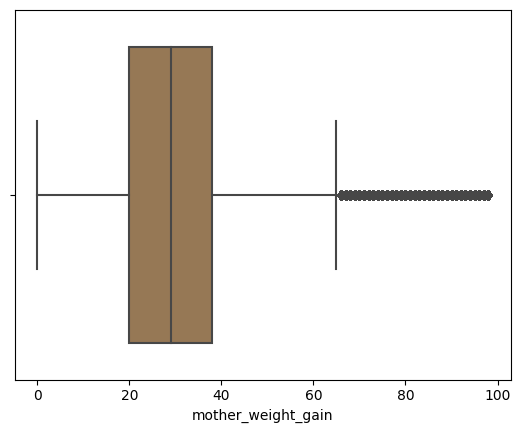

In [87]:
sns.boxplot(data=df, x="mother_weight_gain", palette=("cubehelix"))

In [88]:
df["mother_weight_gain"].fillna(df["mother_weight_gain"].median(), inplace=True)

In [89]:
df.isna().sum()

mother_body_mass_index              0
mother_marital_status          401891
mother_delivery_weight              0
mother_race                         0
mother_height                       0
mother_weight_gain                  0
father_age                     428072
father_education                    0
cigarettes_before_pregnancy      9037
prenatal_care_month                 0
number_prenatal_visits          49540
previous_cesarean                   0
newborn_gender                      0
newborn_weight                      0
dtype: int64

count   1903531.00
mean         31.79
std           6.80
min          11.00
1%           19.00
5%           21.00
10%          23.00
25%          27.00
50%          31.00
75%          36.00
90%          40.00
95%          43.00
99%          51.00
max          98.00
Name: father_age, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32664\2450724490.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['father_age'], color='g', bins=100, hist_kws={'alpha': 0.4});


31.786556142243022
31.0
32.0


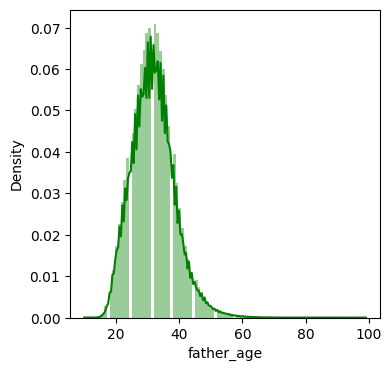

In [90]:
print(df['father_age'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95,  0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(df['father_age'], color='g', bins=100, hist_kws={'alpha': 0.4});

print(df["father_age"].mean())
print(df["father_age"].median())
print(df["father_age"].mode().iloc[0])

<Axes: xlabel='father_age'>

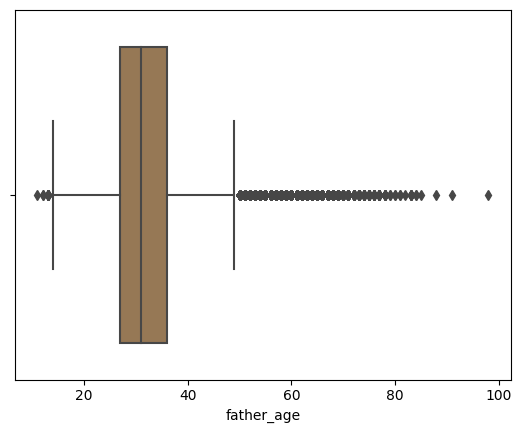

In [91]:
sns.boxplot(data=df, x="father_age", palette=("cubehelix"))

In [92]:
df=df[(df["father_age"]>16) & (df["father_age"]<65)]

In [93]:
df["father_age"].fillna(df["father_age"].median(), inplace=True)

In [94]:
df["mother_marital_status"].fillna(df["mother_marital_status"].mode().iloc[0], inplace=True)

count   1862672.00
mean         11.53
std           4.03
min           0.00
1%            0.00
5%            5.00
10%           7.00
25%          10.00
50%          12.00
75%          14.00
90%          16.00
95%          18.00
99%          24.00
max          98.00
Name: number_prenatal_visits, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32664\1695980469.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_prenatal_visits'], color='g', bins=100, hist_kws={'alpha': 0.4});


11.529718060936117
12.0
12.0


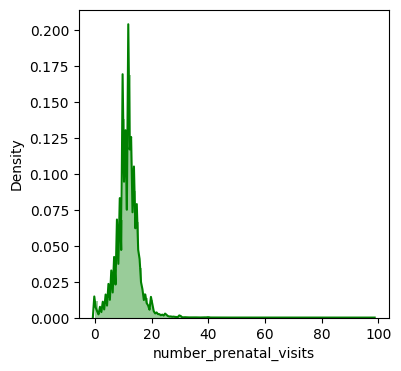

In [95]:
print(df["number_prenatal_visits"].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95,  0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(df['number_prenatal_visits'], color='g', bins=100, hist_kws={'alpha': 0.4});

print(df["number_prenatal_visits"].mean())
print(df["number_prenatal_visits"].median())
print(df["number_prenatal_visits"].mode().iloc[0])

In [96]:
df[df["number_prenatal_visits"]>90]

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
1141629,34.80,2.00,221.00,1,68.00,0.00,44.00,3,0.00,2,97.00,N,M,2430
1578624,41.10,2.00,167.00,4,57.00,29.00,27.00,9,0.00,3,98.00,Y,M,2060


In [97]:
df["number_prenatal_visits"].fillna(df["number_prenatal_visits"].median(), inplace=True)

In [98]:
df.isna().sum()

mother_body_mass_index            0
mother_marital_status             0
mother_delivery_weight            0
mother_race                       0
mother_height                     0
mother_weight_gain                0
father_age                        0
father_education                  0
cigarettes_before_pregnancy    6201
prenatal_care_month               0
number_prenatal_visits            0
previous_cesarean                 0
newborn_gender                    0
newborn_weight                    0
dtype: int64

count   1894451.00
mean          0.91
std           4.26
min           0.00
1%            0.00
5%            0.00
10%           0.00
25%           0.00
50%           0.00
75%           0.00
90%           0.00
95%           6.00
99%          20.00
max          98.00
Name: cigarettes_before_pregnancy, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32664\2098458492.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cigarettes_before_pregnancy'], color='g', bins=100, hist_kws={'alpha': 0.4});


0.909449756156269
0.0
0.0


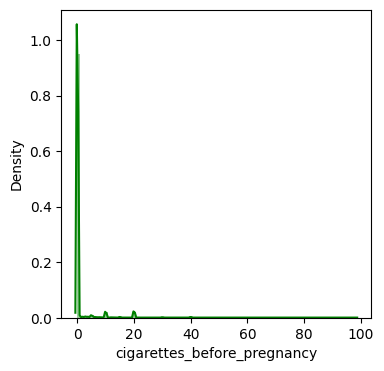

In [99]:
print(df["cigarettes_before_pregnancy"].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95,  0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(df['cigarettes_before_pregnancy'], color='g', bins=100, hist_kws={'alpha': 0.4});

print(df["cigarettes_before_pregnancy"].mean())
print(df["cigarettes_before_pregnancy"].median())
print(df["cigarettes_before_pregnancy"].mode().iloc[0])

In [100]:
df["cigarettes_before_pregnancy"].fillna(df["cigarettes_before_pregnancy"].median(), inplace=True)

In [101]:
df.isna().sum()

mother_body_mass_index         0
mother_marital_status          0
mother_delivery_weight         0
mother_race                    0
mother_height                  0
mother_weight_gain             0
father_age                     0
father_education               0
cigarettes_before_pregnancy    0
prenatal_care_month            0
number_prenatal_visits         0
previous_cesarean              0
newborn_gender                 0
newborn_weight                 0
dtype: int64

In [102]:
df["mother_marital_status"].replace({1: "Yes", 2: "No"}, inplace=True)

In [103]:
df["mother_race"].replace({1: "White", 2: "Black", 3: "AIAN", 4: "Asian", 5: "NHOPI", 6: "Others"}, inplace=True)

In [104]:
df.head()

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
0,30.80,No,220.00,White,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045
1,45.80,Yes,293.00,White,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061
3,24.30,Yes,157.00,White,62.96,20.00,27.00,6,0.00,3,9.00,N,M,3997
4,24.10,Yes,187.00,White,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240
5,30.90,No,231.00,White,63.99,51.00,27.00,3,0.00,4,10.00,N,M,3544


In [105]:
df["father_education"].value_counts()

3    555051
6    371384
4    348506
2    165010
7    146189
5    135772
1     68523
8     64334
9     45883
Name: father_education, dtype: int64

In [106]:
df["father_education"].replace({9:0}, inplace=True)

In [107]:
df["prenatal_care_month"].value_counts()

2     783187
3     597399
4     159431
1     112004
5      75308
6      44900
99     36895
7      35131
8      25750
0      20757
9       9712
10       178
Name: prenatal_care_month, dtype: int64

In [108]:
df["prenatal_care_month"].replace({99:-1}, inplace=True)

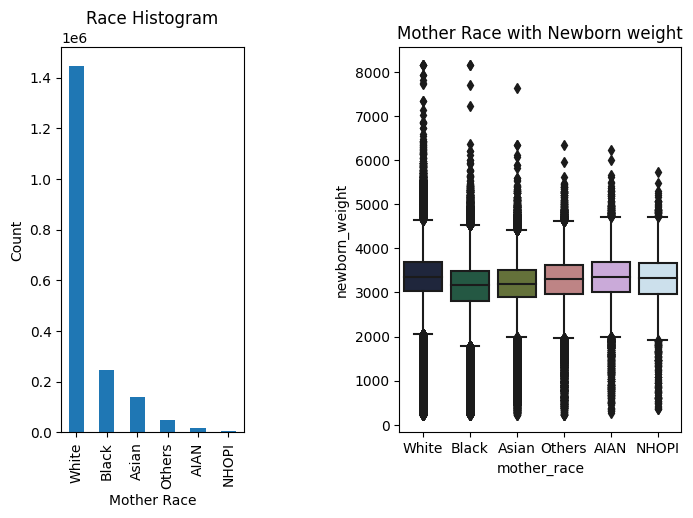

In [109]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt1 = df["mother_race"].value_counts().plot(kind='bar')
plt.title('Race Histogram')
plt1.set(xlabel = 'Mother Race', ylabel='Count')

plt.subplot(1,2,2)
plt.title('Mother Race with Newborn weight')
sns.boxplot(x=df.mother_race, y=df.newborn_weight, palette=("cubehelix"))

plt.show()

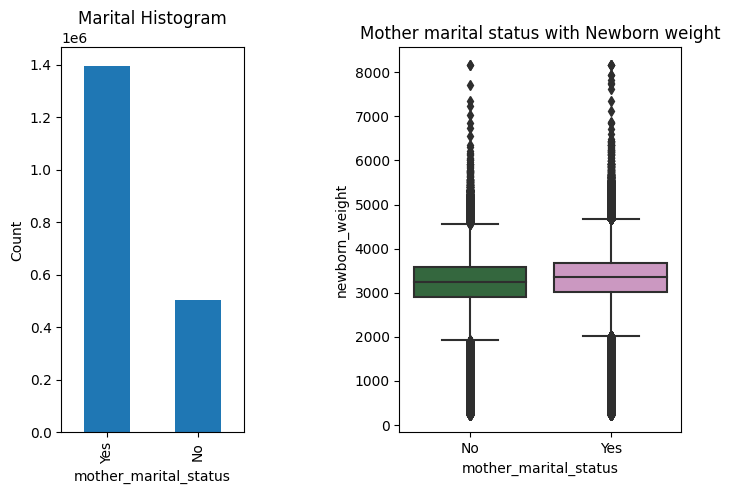

In [110]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt1 = df["mother_marital_status"].value_counts().plot(kind='bar')
plt.title('Marital Histogram')
plt1.set(xlabel = 'mother_marital_status', ylabel='Count')

plt.subplot(1,2,2)
plt.title('Mother marital status with Newborn weight')
sns.boxplot(x=df.mother_marital_status, y=df.newborn_weight, palette=("cubehelix"))

plt.show()

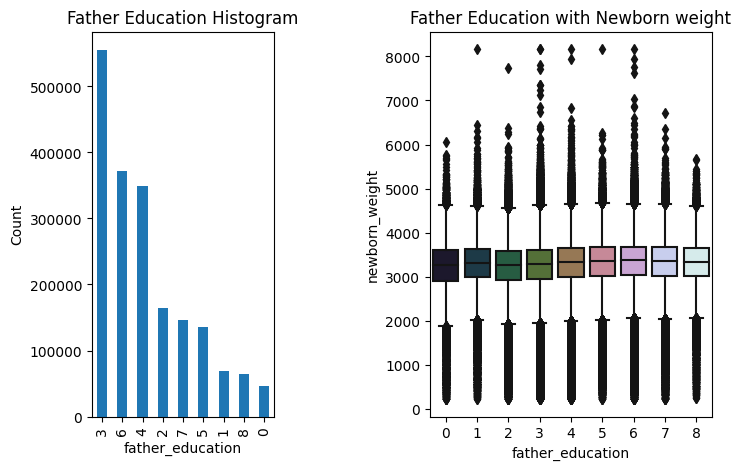

In [111]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt1 = df["father_education"].value_counts().plot(kind='bar')
plt.title('Father Education Histogram')
plt1.set(xlabel = 'father_education', ylabel='Count')

plt.subplot(1,2,2)
plt.title('Father Education with Newborn weight')
sns.boxplot(x=df.father_education, y=df.newborn_weight, palette=("cubehelix"))

plt.show()

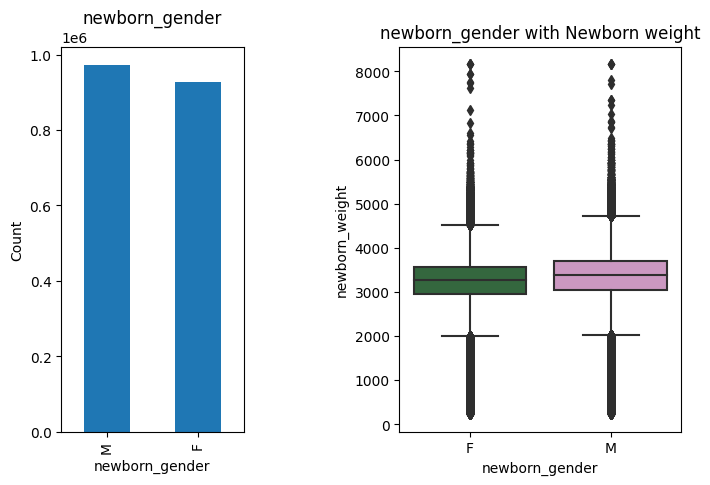

In [112]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt1 = df["newborn_gender"].value_counts().plot(kind='bar')
plt.title('newborn_gender')
plt1.set(xlabel = 'newborn_gender', ylabel='Count')

plt.subplot(1,2,2)
plt.title('newborn_gender with Newborn weight')
sns.boxplot(x=df.newborn_gender, y=df.newborn_weight, palette=("cubehelix"))

plt.show()

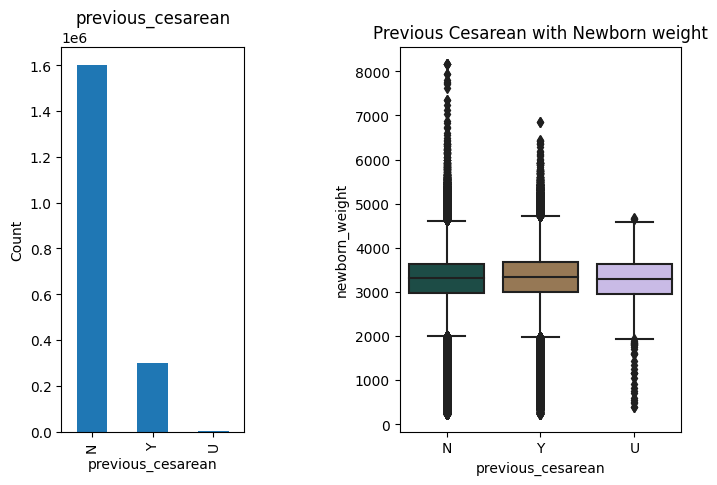

In [113]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt1 = df["previous_cesarean"].value_counts().plot(kind='bar')
plt.title('previous_cesarean')
plt1.set(xlabel = 'previous_cesarean', ylabel='Count')

plt.subplot(1,2,2)
plt.title('Previous Cesarean with Newborn weight')
sns.boxplot(x=df.previous_cesarean, y=df.newborn_weight, palette=("cubehelix"))

plt.show()

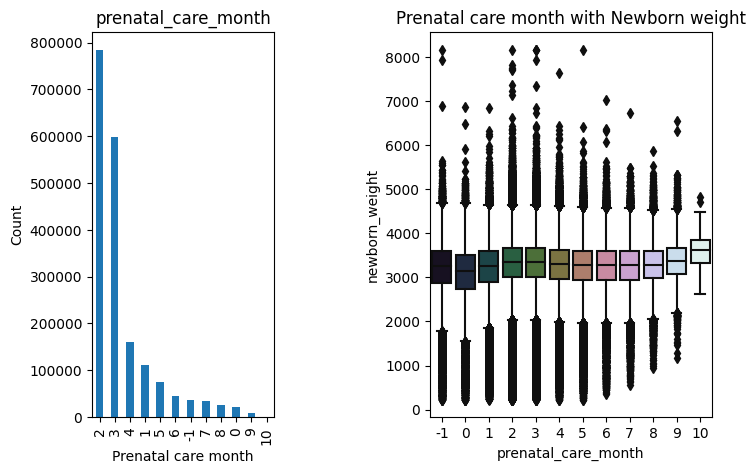

In [114]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt1 = df["prenatal_care_month"].value_counts().plot(kind='bar')
plt.title('prenatal_care_month')
plt1.set(xlabel = 'Prenatal care month', ylabel='Count')

plt.subplot(1,2,2)
plt.title('Prenatal care month with Newborn weight')
sns.boxplot(x=df.prenatal_care_month, y=df.newborn_weight, palette=("cubehelix"))

plt.show()

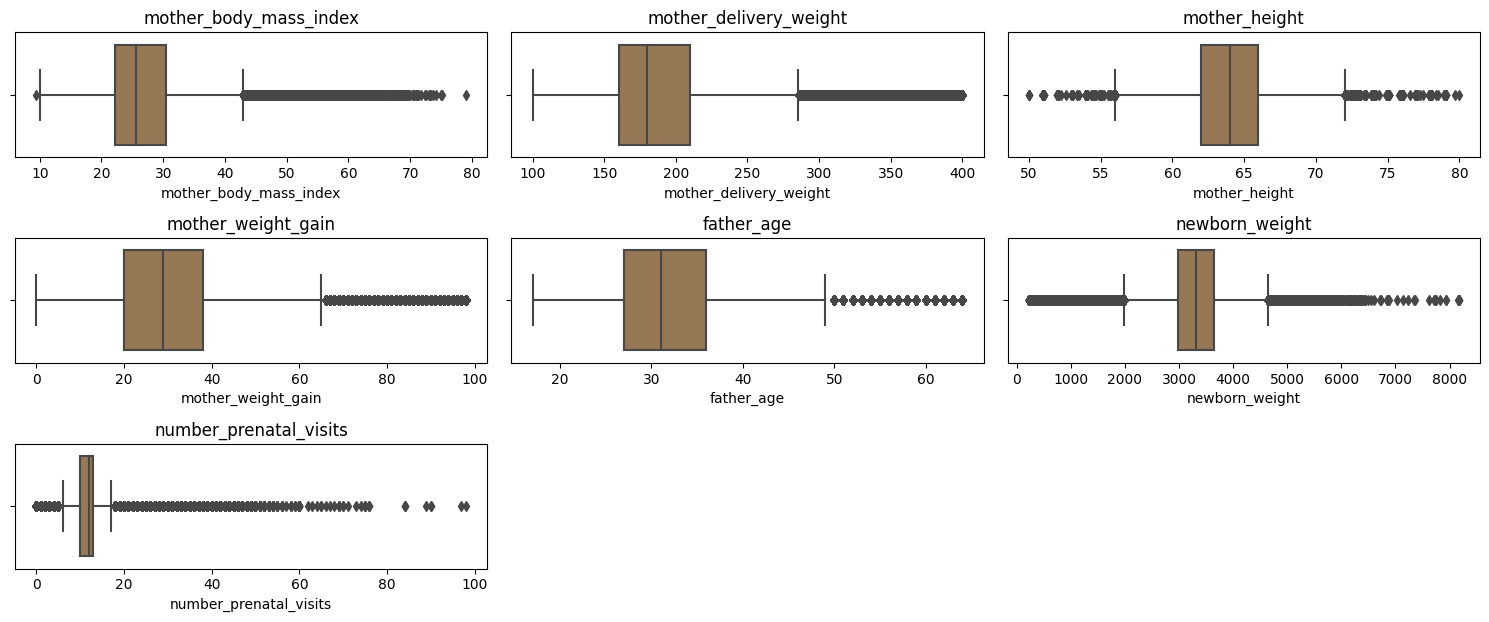

In [115]:
lst = ['mother_body_mass_index',  'mother_delivery_weight',  'mother_height',
       'mother_weight_gain', 'father_age',  'newborn_weight', "number_prenatal_visits" ]

plt.figure(figsize=(15, 10))

for i in range(len(lst)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x=lst[i], palette=("cubehelix"))
    plt.title(lst[i])

plt.tight_layout()
plt.show()

In [116]:
df=df[df["newborn_weight"]<6500]

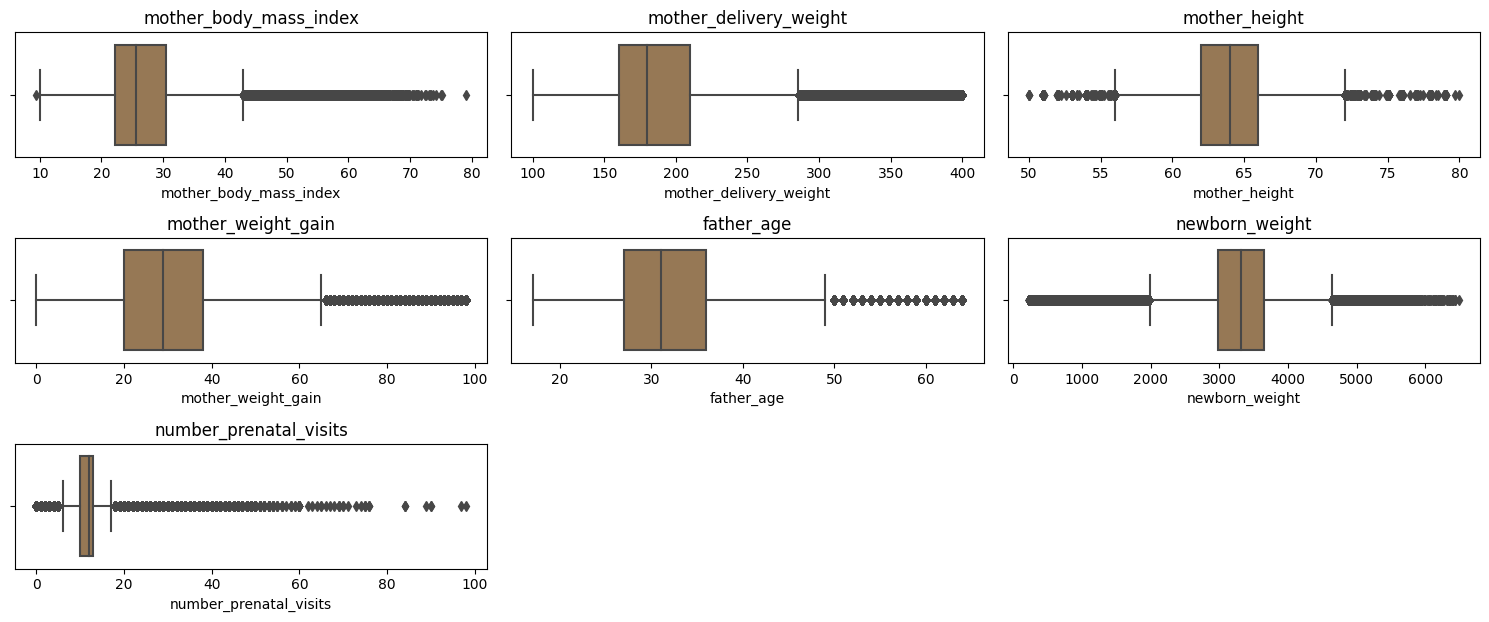

In [117]:
lst = ['mother_body_mass_index',  'mother_delivery_weight',  'mother_height',
       'mother_weight_gain', 'father_age',  'newborn_weight', "number_prenatal_visits" ]

plt.figure(figsize=(15, 10))

for i in range(len(lst)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x=lst[i], palette=("cubehelix"))
    plt.title(lst[i])

plt.tight_layout()
plt.show()

In [118]:
df=df[df["number_prenatal_visits"]<85]

In [119]:
columns_to_encode = ['mother_marital_status', 'mother_race', 'previous_cesarean', 'newborn_gender']

df_ohe = pd.get_dummies(df, columns=columns_to_encode)

# Print the encoded dataframe
df_ohe.head()

,mother_body_mass_index,mother_delivery_weight,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,newborn_weight,mother_marital_status_No,mother_marital_status_Yes,mother_race_AIAN,mother_race_Asian,mother_race_Black,mother_race_NHOPI,mother_race_Others,mother_race_White,previous_cesarean_N,previous_cesarean_U,previous_cesarean_Y,newborn_gender_F,newborn_gender_M
0,30.80,220.00,65.00,35.00,29.00,6,0.00,2,10.00,3045,1,0,0,0,0,0,0,1,1,0,0,1,0
1,45.80,293.00,64.00,26.00,37.00,4,0.00,3,10.00,3061,0,1,0,0,0,0,0,1,1,0,0,1,0
3,24.30,157.00,62.96,20.00,27.00,6,0.00,3,9.00,3997,0,1,0,0,0,0,0,1,1,0,0,0,1
4,24.10,187.00,65.00,42.00,29.00,8,0.00,2,12.00,3240,0,1,0,0,0,0,0,1,1,0,0,1,0
5,30.90,231.00,63.99,51.00,27.00,3,0.00,4,10.00,3544,1,0,0,0,0,0,0,1,1,0,0,0,1


In [122]:
df_ohe.isna().sum()

mother_body_mass_index         0
mother_delivery_weight         0
mother_height                  0
mother_weight_gain             0
father_age                     0
father_education               0
cigarettes_before_pregnancy    0
prenatal_care_month            0
number_prenatal_visits         0
newborn_weight                 0
mother_marital_status_Yes      0
mother_race_AIAN               0
mother_race_Asian              0
mother_race_Black              0
mother_race_NHOPI              0
mother_race_White              0
previous_cesarean_N            0
previous_cesarean_Y            0
newborn_gender_M               0
dtype: int64

In [121]:
df_ohe.drop(["mother_marital_status_No", "mother_race_Others", "previous_cesarean_U", "newborn_gender_F"], axis=1, inplace=True)

In [57]:
df_ohe.head()

,mother_body_mass_index,mother_delivery_weight,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,newborn_weight,mother_marital_status_Yes,mother_race_AIAN,mother_race_Asian,mother_race_Black,mother_race_NHOPI,mother_race_White,previous_cesarean_N,previous_cesarean_Y,newborn_gender_M
0,30.80,220.00,65.00,35.00,29.00,6,0.00,2,10.00,3045,0,0,0,0,0,1,1,0,0
1,45.80,293.00,64.00,26.00,37.00,4,0.00,3,10.00,3061,1,0,0,0,0,1,1,0,0
3,24.30,157.00,62.96,20.00,27.00,6,0.00,3,9.00,3997,1,0,0,0,0,1,1,0,1
4,24.10,187.00,65.00,42.00,29.00,8,0.00,2,12.00,3240,1,0,0,0,0,1,1,0,0
5,30.90,231.00,63.99,51.00,27.00,3,0.00,4,10.00,3544,0,0,0,0,0,1,1,0,1


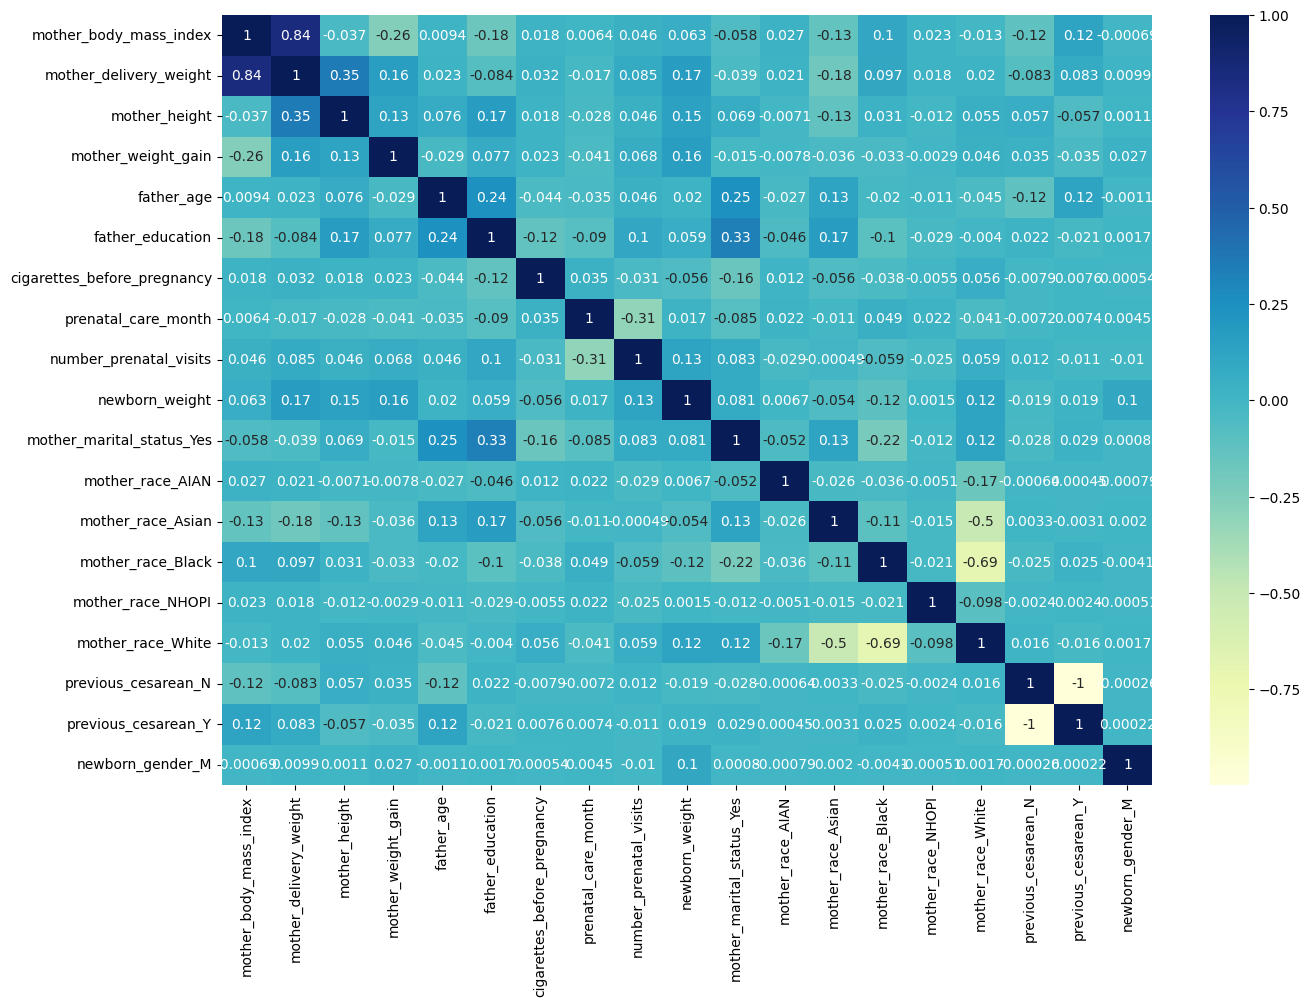

In [123]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_ohe.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [124]:
print("Find most important features relative to Account Status")
corr = df_ohe.corr()
corr.sort_values(["newborn_weight"], ascending = False, inplace = True)
print(corr.newborn_weight)

Find most important features relative to Account Status
newborn_weight                 1.00
mother_delivery_weight         0.17
mother_weight_gain             0.16
mother_height                  0.15
number_prenatal_visits         0.13
mother_race_White              0.12
newborn_gender_M               0.10
mother_marital_status_Yes      0.08
mother_body_mass_index         0.06
father_education               0.06
father_age                     0.02
previous_cesarean_Y            0.02
prenatal_care_month            0.02
mother_race_AIAN               0.01
mother_race_NHOPI              0.00
previous_cesarean_N           -0.02
mother_race_Asian             -0.05
cigarettes_before_pregnancy   -0.06
mother_race_Black             -0.12
Name: newborn_weight, dtype: float64


In [128]:
df_ohe.shape

(1900621, 19)

In [141]:
df1=df_ohe.copy()

df1['newborn_weight'] = np.log1p(df1['newborn_weight'])

X = df1.drop(['newborn_weight'],axis=1)
y = df1['newborn_weight']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

lin_reg = LinearRegression()
rfe_mod = RFE(lin_reg)
myvalues= rfe_mod.fit(X,y)
print(myvalues.ranking_)
print(myvalues.support_)
print(myvalues.n_features_)
X.columns[myvalues.support_]

[ 6  9  1  7 10  8  4  2  3  1  1  1  1  1  1  5  1  1]
[False False  True False False False False False False  True  True  True
  True  True  True False  True  True]
9


Index(['mother_height', 'mother_marital_status_Yes', 'mother_race_AIAN',
       'mother_race_Asian', 'mother_race_Black', 'mother_race_NHOPI',
       'mother_race_White', 'previous_cesarean_Y', 'newborn_gender_M'],
      dtype='object')

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score 

regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Get the test predicted values
y_pred = regressor.predict(X_test)

# Get the train predicted values
x_pred= regressor.predict(X_train)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape_test = mean_absolute_percentage_error (y_test, y_pred)
mape_train = mean_absolute_percentage_error(y_train, x_pred)
mse = mean_squared_error(y_test, y_pred)



# Print the MAPE
print("Mean Absolute Percentage Error (MAPE Test):", mape_test)
print("Mean Absolute Percentage Error (MAPE Train):", mape_train)
print("Mean Squared Error (MSE):", mse)


evaluation_metrics2 = pd.DataFrame({'Metric_rfe': ['Mean Absolute Percentage Error (MAPE Test)', "Mean Absolute Percentage Error (MAPE Train)",  'Mean Squared Error (MSE)'],
                                   'Value': [mape_test,mape_train, mse]})

evaluation_metrics2

Mean Absolute Percentage Error (MAPE Test): 0.01723195765699634
Mean Absolute Percentage Error (MAPE Train): 0.01716094785117823
Mean Squared Error (MSE): 0.044858714355660335


,Metric_rfe,Value
0,Mean Absolute Percentage Error (MAPE Test),0.02
1,Mean Absolute Percentage Error (MAPE Train),0.02
2,Mean Squared Error (MSE),0.04


In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
models = {
        'LinearRegression': LinearRegression(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'SVR': SVR(),
        'RANSACRegressor': RANSACRegressor(),
        'GradientBoostingRegressor': GradientBoostingRegressor(),
        'AdaBoostRegressor': AdaBoostRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'LightGBM': lgb.LGBMRegressor(),
        'XGBoost': xgb.XGBRegressor()
    }

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring=make_scorer(mean_absolute_percentage_error), cv=10, n_jobs=-1)
    print('Cross-Validation Model: {}'.format(name))
    mape_average = np.mean(scores)
    print('Average MAPE: ', mape_average)
    print('*' * 100)

Cross-Validation Model: LinearRegression
Average MAPE:  0.0171612274917703
****************************************************************************************************
Cross-Validation Model: DecisionTreeRegressor
Average MAPE:  0.02467812731600618
****************************************************************************************************
Cross-Validation Model: Lasso
Average MAPE:  0.01798514336175893
****************************************************************************************************
Cross-Validation Model: Ridge
Average MAPE:  0.017161227147515452
****************************************************************************************************
